<a href="https://colab.research.google.com/github/benai9916/face-mask-detection/blob/main/face_mask_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training CNN model to predict Mask and No Mask  (Images)



# Install Packages

In [ ]:
!pip install tensorflow==2.3.0
!pip install keras==2.4.3
!pip install gdown

In [ ]:
# Load data

!gdown --id 1qkuQV1wApJ9wSTc07hDkzzqBUWlPSx8C --output dataset.zip
!unzip dataset.zip

# Training model

In [3]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

import tensorflow

print(keras.__version__)
print(tensorflow.__version__)

2.4.3
2.3.0


In [4]:
train_data_path = "/content/dataset/train"
validation_data_path = "/content/dataset/valid"

In [5]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 3649 images belonging to 2 classes.


In [7]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [8]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 806 images belonging to 2 classes.


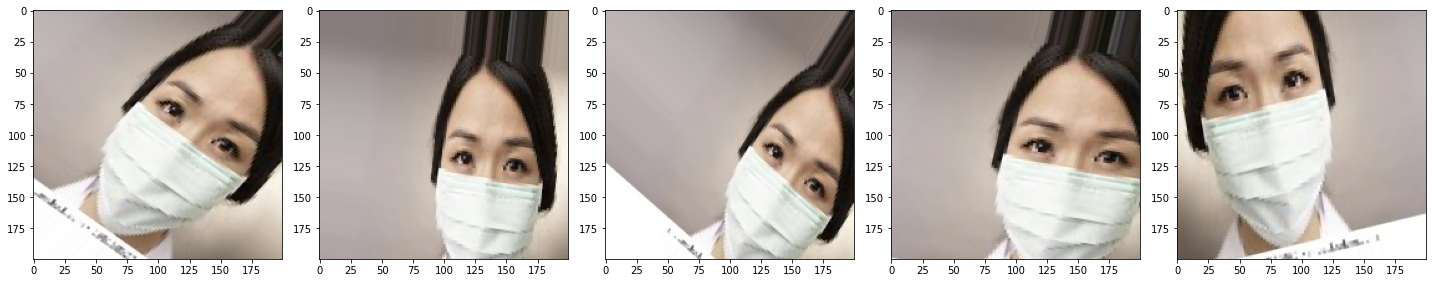

In [9]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [10]:
# make dir for model
import os
os.makedirs('model', exist_ok=True)

In [11]:
# save best model using vall accuracy (Call back)
model_path = '/content/model/model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [12]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),
                                                                                                           
                                    keras.layers.Flatten(), # neural network beulding
                                     
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

In [14]:
cnn_model.save('/content/model/model_last.h5')

In [15]:
# dowload model

from google.colab import files
files.download('model/model_last.h5')
files.download('model/model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

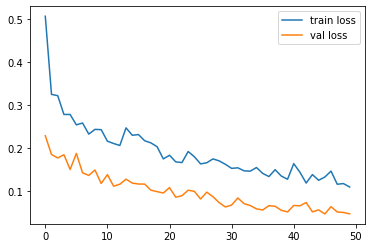

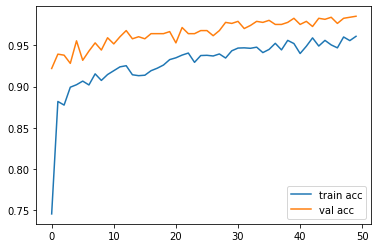

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')